<a href="https://colab.research.google.com/github/pmikedele-coder/ProyectoParteIII_Perez/blob/main/ProyectoParteIII%2BPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [ ]:

print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas de 'Calories_Burned':")
print(df['Calories_Burned'].describe())


Primeras filas del dataset:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experie

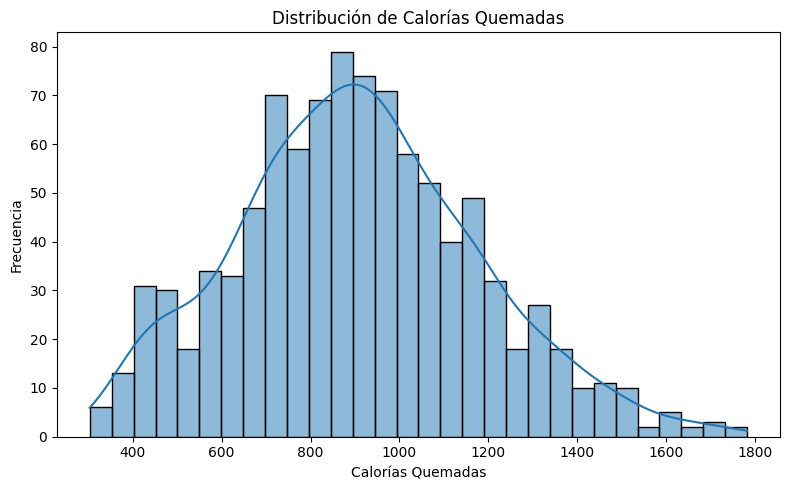

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Calories_Burned'], bins=30, kde=True)
plt.title('Distribución de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


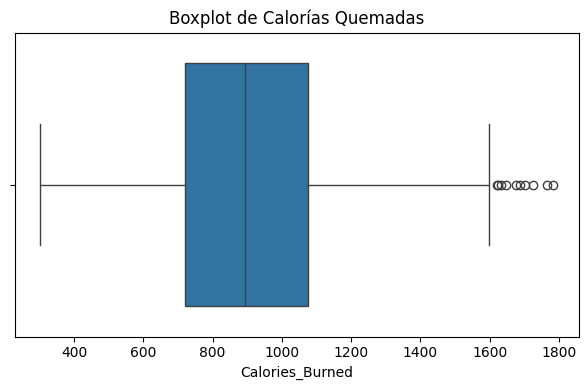

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Calories_Burned'])
plt.title('Boxplot de Calorías Quemadas')
plt.tight_layout()
plt.show()


In [ ]:

df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Workout_Type'] = df_encoded['Workout_Type'].astype('category').cat.codes


In [ ]:

X = df_encoded.drop(columns=['Calories_Burned'])
y = df_encoded['Calories_Burned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


In [ ]:

print("\nEvaluación del modelo:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")



Evaluación del modelo:
MAE (Error Absoluto Medio): 36.16
MSE (Error Cuadrático Medio): 2280.33
RMSE (Raíz del Error Cuadrático Medio): 47.75
R² (Coeficiente de determinación): 0.9727


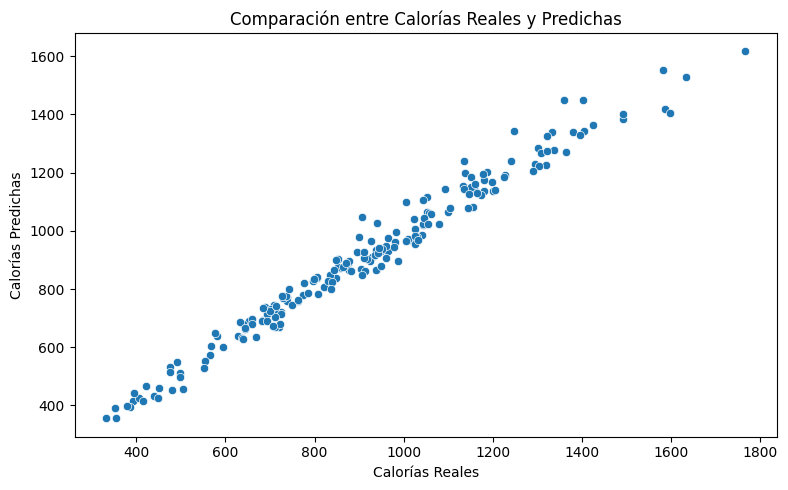

In [ ]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.title('Comparación entre Calorías Reales y Predichas')
plt.tight_layout()
plt.show()
